In [1]:
import torch
from boardGPT.nn.register import ActivationRecorder
from boardGPT.utils import load_safetensors
from IPython.display import HTML

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_safetensors("../out/safetensors/model.safetensors", "../out/safetensors/config.json")
model = model.to(device)
model.set_flash(False)

Loading weights from safetensors file: ../out/safetensors/model.safetensors
Successfully loaded weights from ../out/safetensors/model.safetensors


## Add a hook

In [3]:
tok_emb = None

def token_emb_fn(x):
    global tok_emb
    tok_emb = x
    return x
# end token_emb_fn

# Add hooks
model.token_emb_hook.add_hook(token_emb_fn)
model.transformer['h'][-1]

In [4]:
moves = model.generate_moves(
    sequence=['c4', 'c3'],
    max_new_tokens=1,
    device=device
)

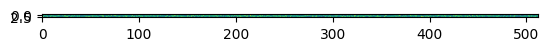

In [8]:
import matplotlib.pyplot as plt
plt.imshow(tok_emb[0].cpu().detach().numpy())

## Get activations from recorder

In [3]:
game = ['d7', 'c7', 'b7', 'e7', 'f7', 'f8', 'c6', 'a8', 'e3', 'e2', 'c5', 'b6']
recorder = ActivationRecorder()
moves = model.generate_moves(
    sequence=game,
    max_new_tokens=1,
    device=device,
    recorder=recorder
)

In [4]:
moves

['d7', 'c7', 'b7', 'e7', 'f7', 'f8', 'c6', 'a8', 'e3', 'e2', 'c5', 'b6', 'a6']

In [5]:
recorder.keys

['gpt.tok_emb',
 'gpt.pos_emb',
 'gpt.residuals',
 'gpt.layer0.residuals.attn.QK',
 'gpt.layer0.residuals.attn',
 'gpt.layer0.residuals.mlp',
 'gpt.layer1.residuals.attn.QK',
 'gpt.layer1.residuals.attn',
 'gpt.layer1.residuals.mlp',
 'gpt.layer2.residuals.attn.QK',
 'gpt.layer2.residuals.attn',
 'gpt.layer2.residuals.mlp',
 'gpt.layer3.residuals.attn.QK',
 'gpt.layer3.residuals.attn',
 'gpt.layer3.residuals.mlp',
 'gpt.layer4.residuals.attn.QK',
 'gpt.layer4.residuals.attn',
 'gpt.layer4.residuals.mlp',
 'gpt.layer5.residuals.attn.QK',
 'gpt.layer5.residuals.attn',
 'gpt.layer5.residuals.mlp',
 'gpt.layer6.residuals.attn.QK',
 'gpt.layer6.residuals.attn',
 'gpt.layer6.residuals.mlp',
 'gpt.layer7.residuals.attn.QK',
 'gpt.layer7.residuals.attn',
 'gpt.layer7.residuals.mlp']

In [6]:
qk0 = recorder.get("gpt.layer0.residuals.attn.QK")

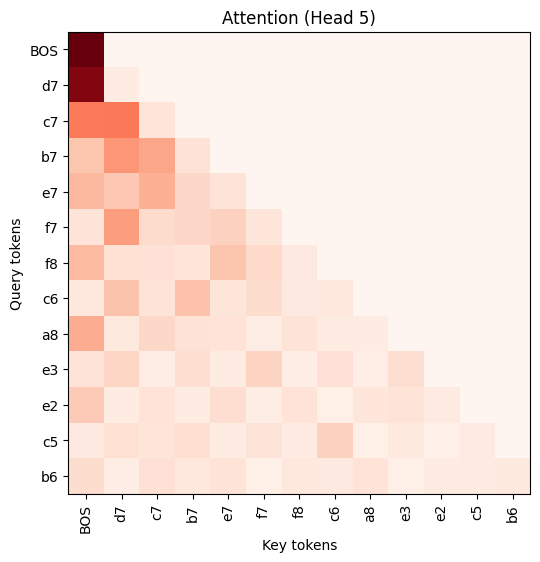

In [7]:
from boardGPT.utils import plot_attention_matrix
plot_attention_matrix(
    qk_matrix=qk0,
    tokens=['BOS', *game],
    head_idx=5
)

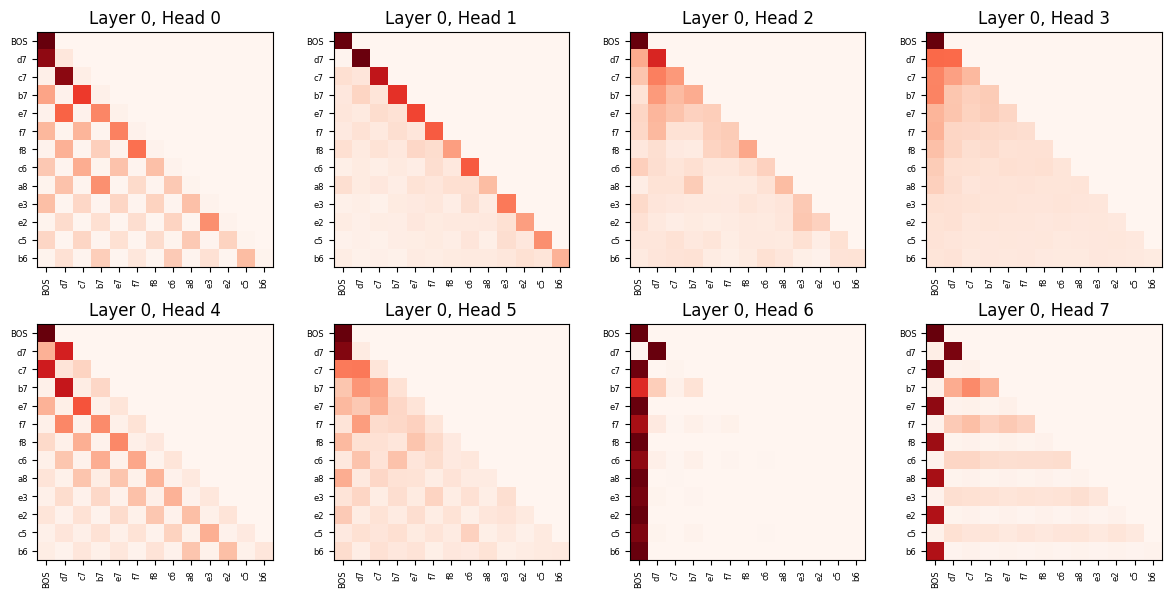

In [8]:
from boardGPT.utils import plot_heads_attention
plot_heads_attention(
    qk_matrix=qk0,
    tokens=['BOS', *game],
    layer_idx=0
)

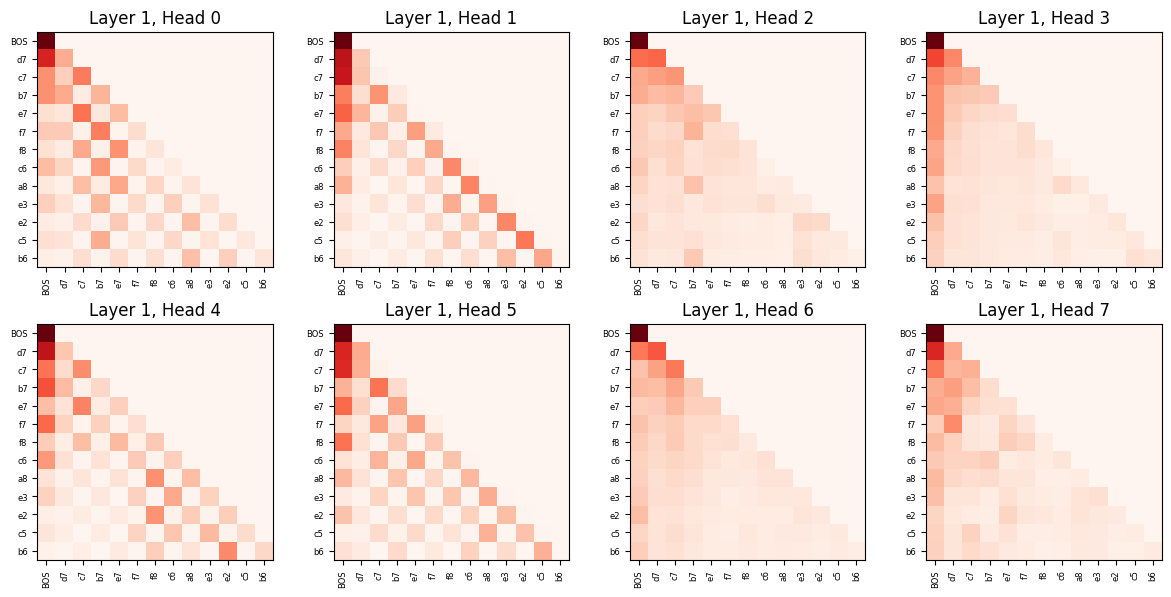

In [10]:
qk1 = recorder.get("gpt.layer1.residuals.attn.QK")
plot_heads_attention(
    qk_matrix=qk1,
    tokens=['BOS', *game],
    layer_idx=1
)

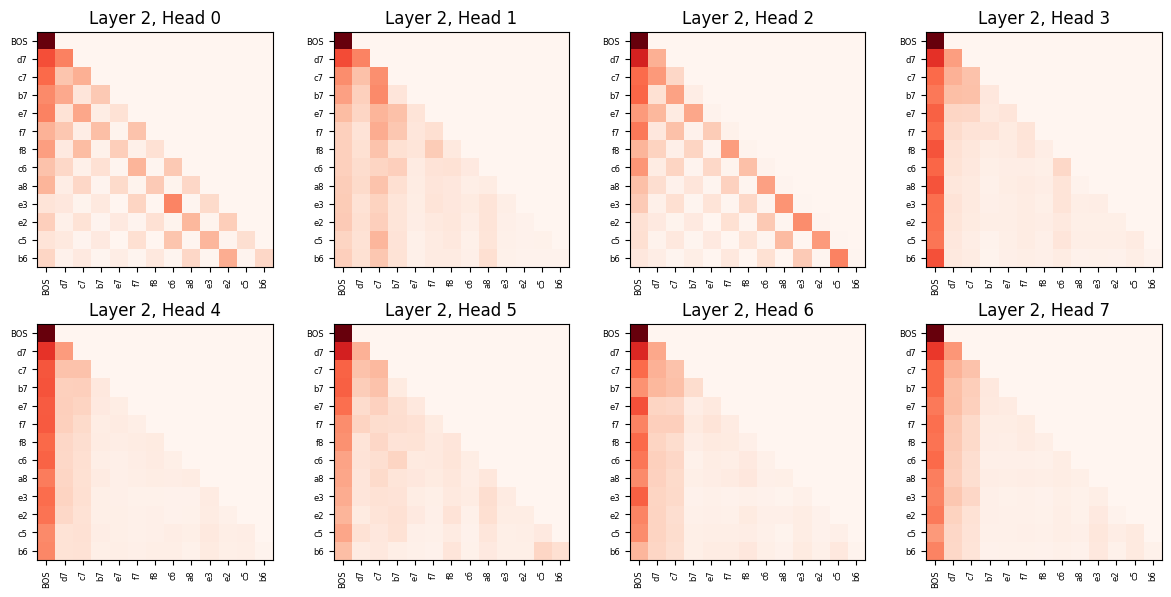

In [11]:
qk2 = recorder.get("gpt.layer2.residuals.attn.QK")
plot_heads_attention(
    qk_matrix=qk2,
    tokens=['BOS', *game],
    layer_idx=2
)

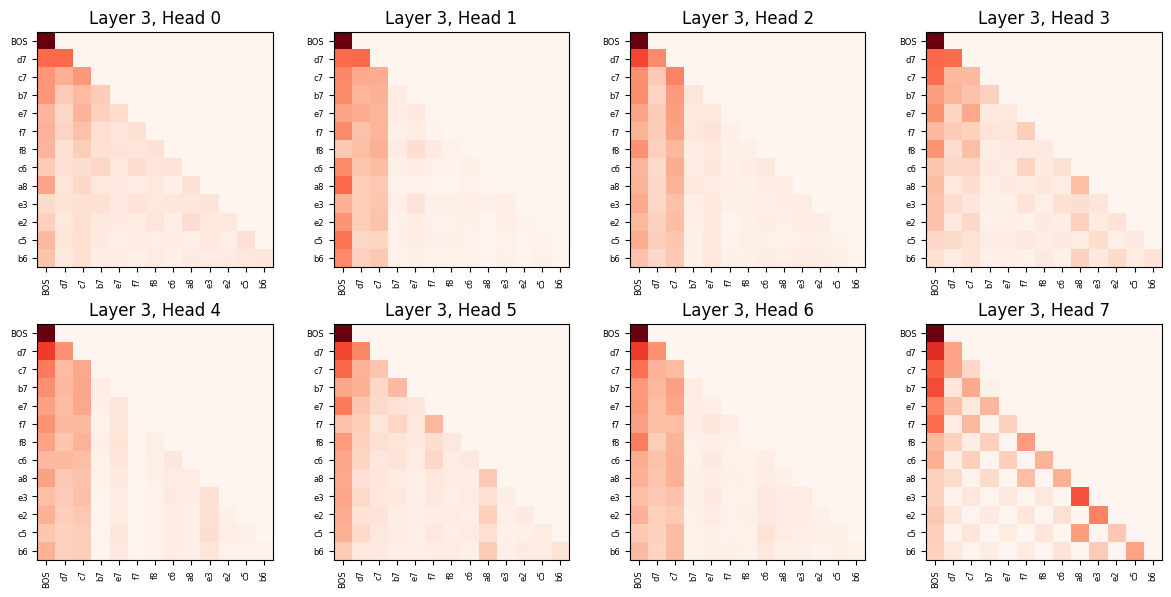

In [12]:
qk3 = recorder.get("gpt.layer3.residuals.attn.QK")
plot_heads_attention(
    qk_matrix=qk3,
    tokens=['BOS', *game],
    layer_idx=3
)